The target attribute is predict happiness score

In [133]:
import datetime as dt

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [134]:
data=pd.read_csv('happinessscore.csv')
data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [135]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

ABOUT THE COLUMNS


Country: The country in question
Region: The region that the country belongs to
Happiness Rank: A country's rank on a world scale - determined by how high their happiness score is.
Happiness Score: A score given to a country based on adding up the rankings that a population has given to each category 
Economy: GDP per capita of the country - individuals rank the quality of life based on the amount they earn
Family: quality of family life, nuclear and joint family
Health: ranking healthcare availability and average life expectancy in the country
Freedom: how much an individual is able to conduct them self based on their free will
Trust: in the government to not be corrupt
Generosity: how much their country is involved in peacekeeping and global aid
Dystopia Residual: Dystopia happiness score (1.85) i.e. the score of a hypothetical country that has a lower rank than the lowest ranking country on the report, plus the residual value of each country.

In [136]:
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

no null data found 

In [137]:
data.shape

(158, 12)

In [138]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [139]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


EDA

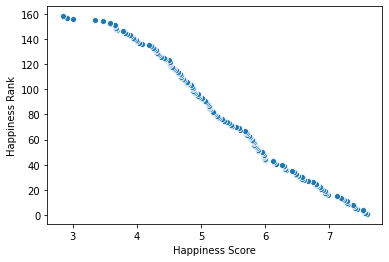

In [140]:
sns.scatterplot(x="Happiness Score",y="Happiness Rank",data=data)

In [141]:
#highest the happiness score the country will be ranked 1 hence we get negative correlation

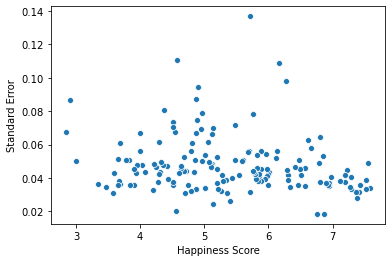

In [142]:
sns.scatterplot(x="Happiness Score",y="Standard Error",data=data)

In [143]:
#standard error is found more between countries whose scores are between 4-7

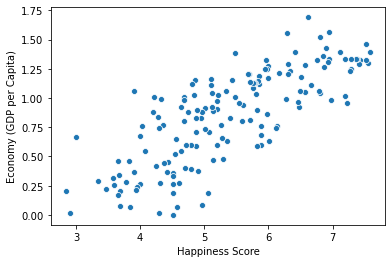

In [144]:
sns.scatterplot(x="Happiness Score",y="Economy (GDP per Capita)",data=data)

In [145]:
#economic position of a country and its citizens happiness are positively correlated

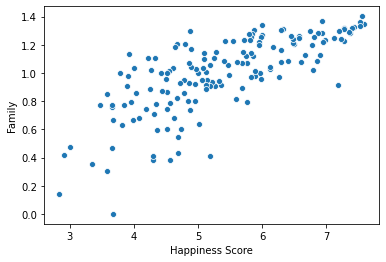

In [146]:
sns.scatterplot(x="Happiness Score",y="Family",data=data)

In [147]:
#quality of family life and happiness score is positively correlated

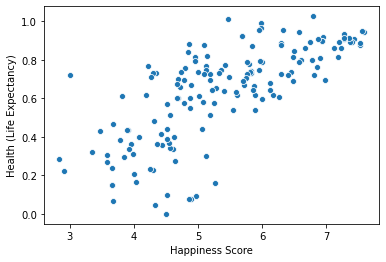

In [148]:
sns.scatterplot(x="Happiness Score",y="Health (Life Expectancy)",data=data) 

#health care services of a country improves life expectancy and its positively correlated to happiness score

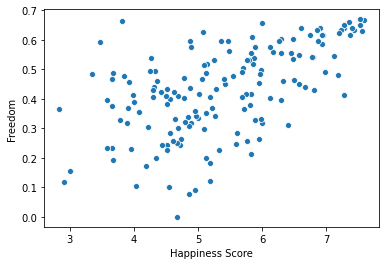

In [149]:
sns.scatterplot(x="Happiness Score",y="Freedom",data=data) 

In [150]:
#we find positive correlation of freedom from 5-7 happiness scoring countries

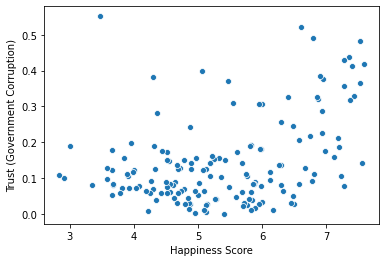

In [151]:
sns.scatterplot(x="Happiness Score",y="Trust (Government Corruption)",data=data) 
       

In [152]:
# Government Corruptions are effecting happiness of countries whose score are between 4-7

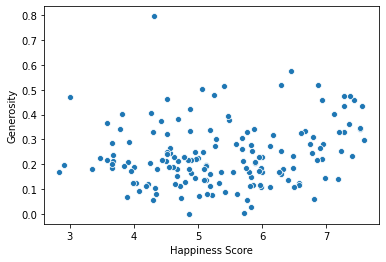

In [153]:
sns.scatterplot(x="Happiness Score",y="Generosity",data=data)

In [154]:
#generosity is effecting happiness of countries whose score are between 4-7

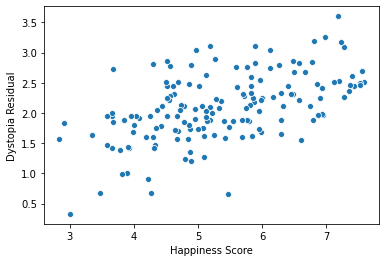

In [155]:
sns.scatterplot(x="Happiness Score",y="Dystopia Residual",data=data)

In [156]:
#positively correlated but scattered densly in 4-6 happiness scoring countries

CORRELATION:

In [157]:
data.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


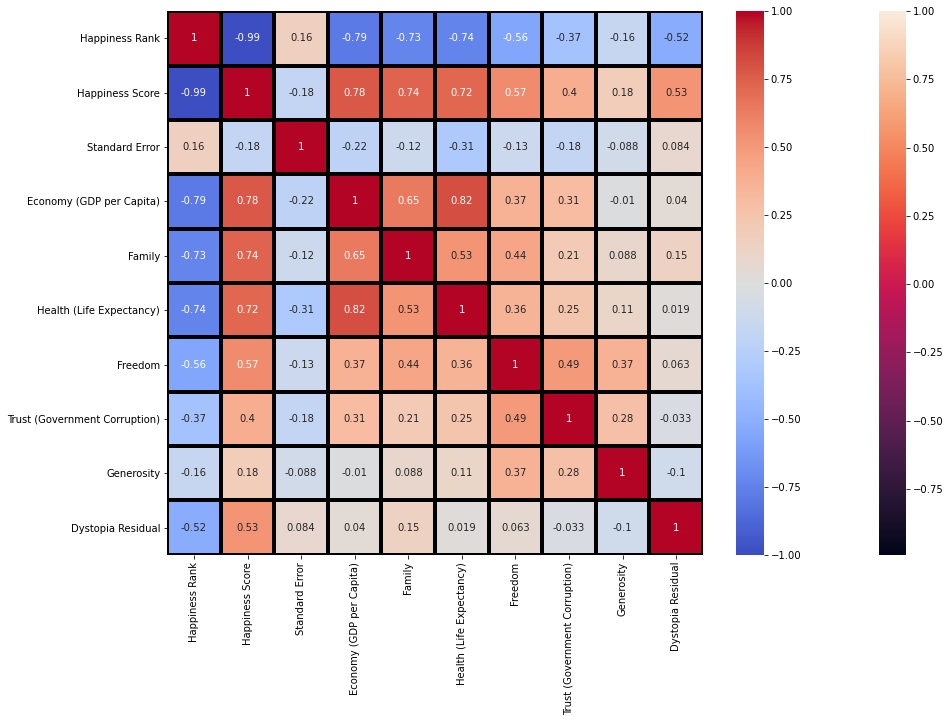

In [158]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr())
sns.heatmap(data.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')

#Happiness score is positively related to 
economy(GDP per capita)= 78%
Family=  74%
Health(life expectancy = 72%
Freedom= 56%
Dystopia residual = 53%

Negative correlation with Happiness score is 
happiness rank = -99%
Standard error = -17%

lowest correslation of happiness score is with
generosity = 18%
trust      = 39%

TypeError: xlabel() missing 1 required positional argument: 'xlabel'

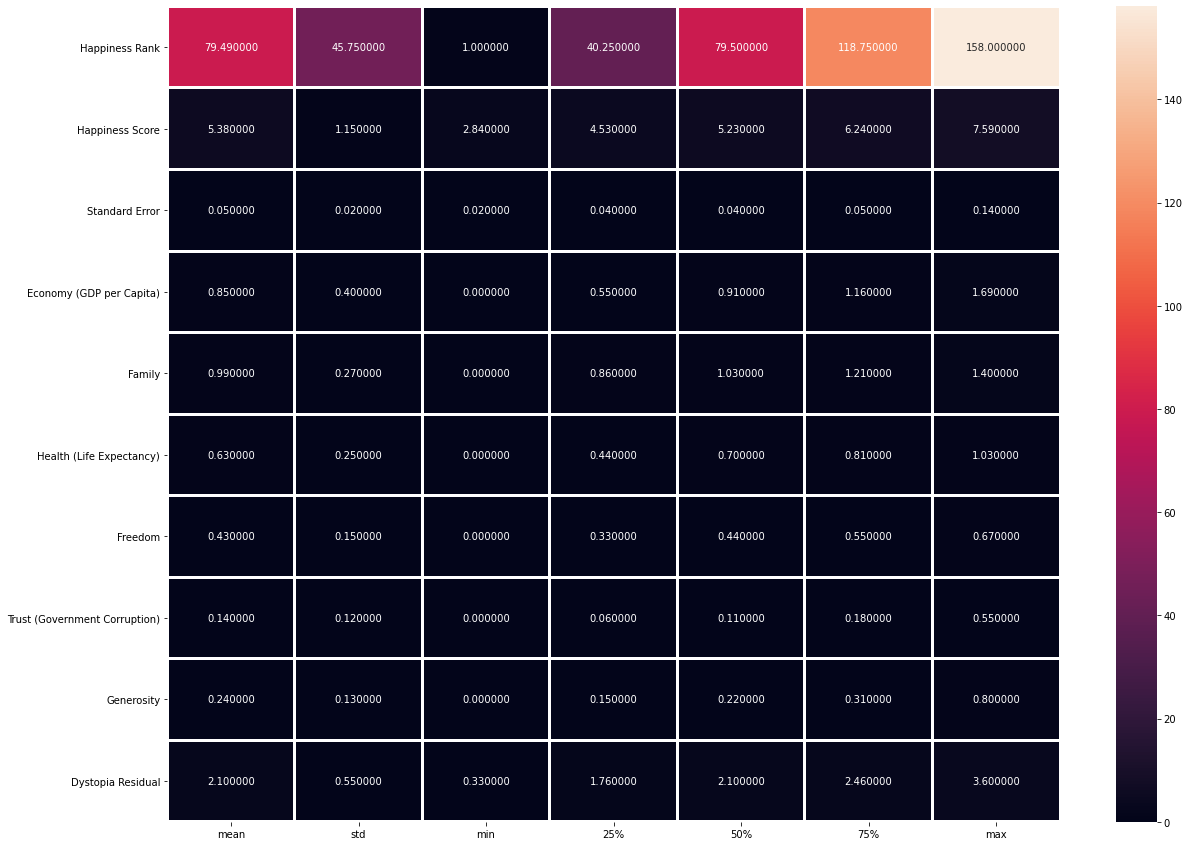

In [159]:
plt.figure(figsize=(20,15))
sns.heatmap(round(data.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xlabel(fontsize=17)
plt.ylabel(fontsize=15)

plt.show()

In [ ]:
data.describe()

# from the above table we find economy and Trust attributes are having little difference with mean and meadian compared to other attributes

Happiness Rank
mean=79.493671
std=45.754363
max-value=158.000000
min-value=1.000000

Happiness Score
mean=5.375734
std=1.145010
max-value=7.587000
min-value=2.839000

Standard Error
mean=0.047885
std=0.017146
max-value=0.136930
min-value=0.018480

Economy (GDP per Capita)
mean=0.846137
std=0.403121
max-valur=1.690420
min-value=0.000000	

Family:
mean=0.991046
std=0.272369
max-value=1.402230
min-value=0.0000

Health (Life Expectancy):
mean=0.630259
std=0.247078
max-value=0.669730
min-value=0.00000

Freedom:
mean=0.428615
std=0.150693
max-value=0.669730
min-value=0.000000

Trust (Government Corruption):
mean=0.143422
std=0.120034
max-value=0.551910
min-value=0.0000


Generosity:
mean=0.237296
std=0.126685
max_value=0.795880
min_value=0.000000

Dystopia Residual:
mean=2.098977
std=0.553550
max_value=3.602140
min_value=0.328580

In [ ]:
data.hist(edgecolor='orange',linewidth=1.5,figsize=(20,20))

from the above charts we can observe that the data is not normally distributed and we should go with data cleansing

In [ ]:
data.columns

In [ ]:
plt.figure(figsize=(10,7))
data.corr()['Happiness Score'].sort_values(ascending=False).drop(['Happiness Score'])
plt.xlabel('Attributes,fontsize=14')
plt.ylabel('Correlation with the happiness score coulmn',fontsize=14)
plt.title('Correlation of Attributes with happiness score columns',fontsize=18)

plt.show()

In [ ]:
happiness_score = data['Happiness Score']
gdp= data['Economy (GDP per Capita)']

plt.scatter(happiness_score, gdp)
plt.title('Scatter plot of Happiness vs GDP')
plt.xlabel('Happiness Score')
plt.ylabel('Economy (GDP per Capita)')
plt.show()


In [ ]:
happiness_score = data['Happiness Score']
Family= data['Family']

plt.scatter(happiness_score, Family)
plt.title('Scatter plot of Happiness vs Family')
plt.xlabel('Happiness Score')
plt.ylabel('Family')
plt.show()

In [ ]:
rich_countries = data[['Country', 'Economy (GDP per Capita)']].groupby('Country').mean().sort_values(by='Economy (GDP per Capita)', ascending=False)
rich_countries.head()

In [ ]:
healthy_countries = data[['Country', 'Health (Life Expectancy)']].sort_values(by='Health (Life Expectancy)', ascending=False)
healthy_countries.head()

In [ ]:
data[['Happiness Score', 'Economy (GDP per Capita)', 'Happiness Rank', 'Standard Error', 'Family', 'Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']].plot(kind='box', subplots=True, layout=(4,4), figsize=(10,8), grid=True)

SKEWNESS:

In [ ]:
data.info()

In [ ]:
data.skew()

high skewness is found in Standar error,Trust,Generosity and Freedom
low skewness in Happiness Rank,Happiness score and Dystopia Residual

In [ ]:
new_data=data.drop(['Country', 'Happiness Rank', 'Region'], axis=1)
new_data.head()


In [ ]:
#checking outliers

In [ ]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(new_data))
threshold=3
np.where(z>3)

In [ ]:
new_data1=new_data[(z<3).all(axis=1)]
new_data1

In [ ]:
new_data.shape

In [ ]:
percentage_loss=((158-149)/158)*100
print(percentage_loss)

checkin the method of removing outliers and percentage of data falls under outliers

quantile method

In [ ]:
Q1=new_data.quantile(0.25)
Q3=new_data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

In [ ]:
new_data2=new_data[~((new_data<Q1-(1.5*IQR))|(new_data>(Q3+(1.5*IQR)))).any(axis=1)]

In [ ]:
new_data2

In [ ]:
percentage_loss=((158-126)/158)*100
print(percentage_loss)

we adopt z score method to remove outliers"

removing skewness by trnsforming data

In [ ]:
new_data1

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

In [ ]:
y=le.fit_transform(y)

In [ ]:
new_data1.info()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

new_data1['Happiness Score']=le.fit_transform(new_data1['Happiness Score'])
var=['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']

for i in var:
    new_data1[i]=le.fit_transform(new_data1[i])


In [ ]:
from sklearn.model_selection import train_test_split
x = new_data1[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']]
y = new_data1['Happiness Score']

In [ ]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

REGRESSION MODEL BUILDING

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import r2_score
from sklearn import linear_model

In [ ]:
max_r_score=0
for r_state in range (42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20) 
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
        
print("max r2 score corresponding to:-",final_r_state,"is",max_r_score)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=2,scoring="r2").mean()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=0.20) 
lreg=linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)



In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print ("r2 score is ",r2_score,(x_test,y_pred))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred)))

In [ ]:
x_train_b,x_test_b,y_train_b,y_test_b=train_test_split(x,y,random_state=50,test_size=0.20)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Regularization

In [ ]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf= GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

In [ ]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
for j in range (2,10):
    lsscore=cross_val_score(ls,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-",j)
    print("Cross validation score is :-",lsc*100)
    print("R2_score is:-",lss*100)
    print("\n")

In [ ]:
print ("at cv :-",2)
print("at cross validation score is :-",42.04283)
print("r2_score:-",97.97330)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
print('Error:-')
print('MeanAbsoluteError:',mean_absolute_error(y_test,pred_ls))
print('MeanSquaredError:',mean_squared_error(y_test,pred_ls))
print('RootMeanSquareError:',np.sqrt(mean_squared_error(y_test,pred_ls)))

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_ls,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Happiness_Score",fontsize=14)
plt.ylabel("Predicted Happiness_Score",fontsize=14)
plt.title("LassoRegression",fontsize=18)
plt.show()

In [ ]:
#DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
parameters={'criterion':['mse','friedman_mse','mae'],'splitter':['best','random']}
dt=DecisionTreeRegressor()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)



In [ ]:
dt=DecisionTreeRegressor(criterion='mse',splitter='best')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_decision=dt.predict(x_test)

dts=r2_score(y_test,pred_decision)
print('R2 Score:',dts*100)

dtscore=cross_val_score(dt,x,y,cv=2)
dtc=dtscore.mean()
print('cross val score:',dtc*100)

In [ ]:
print('Error:-')
print('MeanAbsoluteError:',mean_absolute_error(y_test,pred_decision))
print('MeanSquaredError:',mean_squared_error(y_test,pred_decision))
print('RootMeanSquareError:',np.sqrt(mean_squared_error(y_test,pred_decision)))

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_decision,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Happiness_Scoree",fontsize=14)
plt.ylabel("Predicted Happiness_Score",fontsize=14)
plt.title("DecisionTreeRegressor",fontsize=18)
plt.show()

In [ ]:
#RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['friedman_mse','mae'],'n_estimators':[100,200,300]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
                         
print(clf.best_params_)
                         

In [ ]:
rf=RandomForestRegressor(criterion='mae',n_estimators=200)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_random=rf.predict(x_test)

rfs=r2_score(y_test,pred_random)
print('R2 Score:',rfs*100)

rfscore=cross_val_score(rf,x,y,cv=2)
rfc=rfscore.mean()
print('cross val score:',rfc*100)

In [ ]:
print('Error:-')
print('MeanAbsoluteError:',mean_absolute_error(y_test,pred_random))
print('MeanSquaredError:',mean_squared_error(y_test,pred_random))
print('RootMeanSquareError:',np.sqrt(mean_squared_error(y_test,pred_random)))

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_random,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Happiness_Score",fontsize=14)
plt.ylabel("Predicted Happiness_Score",fontsize=14)
plt.title("RandomForestRegressor",fontsize=18)
plt.show()

In [ ]:
#GradientBoostingRegressor

In [ ]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
parameters={'loss':['ls','lad','huber','quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse','mse']}
gbr=GradientBoostingRegressor()
clf=GridSearchCV(gbr,parameters)
clf.fit(x_train,y_train)
                         
print(clf.best_params_)

In [ ]:
gbr=GradientBoostingRegressor(criterion='friedman_mse',loss='lad',n_estimators=200)
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)
pred_gbr=gbr.predict(x_test)

gbrs=r2_score(y_test,pred_random)
print('R2 SCORE',gbrs*100)

gbscore=cross_val_score(gbr,x,y,cv=2)
gbrc=gbscore.mean()
print('CrossValScore:',gbrc*100)

In [ ]:
print('Error:-')
print('MeanAbsoluteError:',mean_absolute_error(y_test,pred_gbr))
print('MeanSquaredError:',mean_squared_error(y_test,pred_gbr))
print('RootMeanSquareError:',np.sqrt(mean_squared_error(y_test,pred_gbr)))

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_gbr,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Happiness_Score",fontsize=14)
plt.ylabel("Predicted Happiness_Score",fontsize=14)
plt.title("GradientBoostingRegressor",fontsize=18)
plt.show()

In [ ]:
#AdaBoostRegressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ADB=AdaBoostRegressor()
parameters={'base_estimator':[None], 'learning_rate':[1.0,2.0], 'loss':['linear','square','exponential'],'n_estimators':[50,100],'random_state':[50]}
ADB=AdaBoostRegressor()
clf=GridSearchCV(ADB,parameters)
clf.fit(x_train,y_train)
                         
print(clf.best_params_)

In [ ]:
ADB=AdaBoostRegressor(base_estimator='None',learning_rate='2.0',n_estimators=100)

ADB=AdaBoostRegressor()
ADB.fit(x_train,y_train)
pred_ADB=ADB.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(AdaBoostRegressor(),x_train,y_train,cv=2).mean()

print(f"Accuracy={r2score*100},Cross_Val_score={cvscore*100}and difference={(r2score*100)-(cvscore*100)}")

In [ ]:
print('Error:-')
print('MeanAbsoluteError:',mean_absolute_error(y_test,pred_ADB))
print('MeanSquaredError:',mean_squared_error(y_test,pred_ADB))
print('RootMeanSquareError:',np.sqrt(mean_squared_error(y_test,pred_ADB)))

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_SGD,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Happiness_Score",fontsize=14)
plt.ylabel("Predicted Happiness_Score",fontsize=14)
plt.title("AdaBoostRegressor",fontsize=18)
plt.show()

In [ ]:
#SGD Regressor

In [ ]:
from sklearn.linear_model import SGDRegressor
parameters={'alpha':[0.0001,0.001,0.01,0.1],'epsilon':[0.01,0.1],'penalty':['elasticnet'],'max_iter':[1000],'tol':[1e-3]}
SGD=SGDRegressor()
clf=GridSearchCV(SGD,parameters)
clf.fit(x_train,y_train)
                         
print(clf.best_params_)

In [ ]:
SGD=SGDRegressor(alpha=0.01,epsilon=0.1,max_iter=1000,penalty='elasticnet',tol=0.001)
SGD.fit(x_train,y_train)
pred_SGD=SGD.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(SGDRegressor(),x_train,y_train,cv=2).mean()

print(f"Accuracy={r2score*100},Cross_Val_score={cvscore*100}and difference={(r2score*100)-(cvscore*100)}")

In [ ]:
print('Error:-')
print('MeanAbsoluteError:',mean_absolute_error(y_test,pred_SGD))
print('MeanSquaredError:',mean_squared_error(y_test,pred_SGD))
print('RootMeanSquareError:',np.sqrt(mean_squared_error(y_test,pred_SGD)))

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_SGD,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Happiness_Score",fontsize=14)
plt.ylabel("Predicted Happiness_Score",fontsize=14)
plt.title("SGDRegressor",fontsize=18)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

clf=GridSearchCV(SGDRegressor(),parameters,cv=2,scoring='r2')

GCV.fit(x_train,y_train)
GCV.best_estimator_
GCV_pred=GCV.best_estimator_.predict(x_test)


print("Final accuracy:",r2_score(y_test,GCV_pred)*100)
clf.fit

In [ ]:
#the best model is SGD as difference between percentage score and r2 score is optimum (94.72-97.97=3.25) and RMSE is least in this model

In [ ]:
#model saving

In [ ]:
import pickle
filename='Happinessscore.pkl'
pickle.dump(SGD,open(filename,'wb'))

In [ ]:
#Conclusion

In [ ]:
import numpy as np

In [ ]:
a=np.array(y_test)
predicted=np.array(SGD.predict(x_test))

In [ ]:
df_com=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))

In [ ]:
df_com

In [ ]:
#from the above table the model is predicted the values with 95-97% accuracy